In [ ]:
,pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 2.5 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
maxTweets = 10000
# Creating list to append tweet data to
tweets_list2 = []
# Using TwitterSearchScraper to scrape data and append tweets to list
arr = ['#vitbhopal', '#VITB', '#VITBhopal', '#Vellore Institute of Technology Bhopal','#vitb']
for j in arr:
  temp="'"+j+"'"
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(temp).get_items()):
      if i>maxTweets:
          break
      tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-33-907db517a252>:18: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


In [ ]:
##Tweet Scapping just before One Month of VITEEE Exam


In [ ]:
tweets_list2_2022 = []
tweets_list2_2021 = []
tweets_list2_2020 = []
tweets_list2_2019 = []
tweets_list2_2018 = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('viteee exam since:2022-06-01 until:2022-07-31').get_items()):
    if i>maxTweets:
        break
    tweets_list2_2022.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('viteee exam since:2021-05-01 until:2021-06-30').get_items()):
    if i>maxTweets:
        break
    tweets_list2_2021.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


for i,tweet in enumerate(sntwitter.TwitterSearchScraper('viteee exam since:2020-07-01 until:2020-08-30').get_items()):
    if i>maxTweets:
        break
    tweets_list2_2020.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('viteee exam since:2019-03-01 until:2019-04-30').get_items()):
    if i>maxTweets:
        break
    tweets_list2_2019.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('viteee exam since:2018-04-01 until:2018-04-30').get_items()):
    if i>maxTweets:
        break
    tweets_list2_2018.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
# Creating a dataframe from the tweets list above
tweets_df2_2022 = pd.DataFrame(tweets_list2_2022, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df2_2021 = pd.DataFrame(tweets_list2_2021, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df2_2020 = pd.DataFrame(tweets_list2_2020, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df2_2019 = pd.DataFrame(tweets_list2_2019, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df2_2018 = pd.DataFrame(tweets_list2_2018, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])



<ipython-input-4-bd79914e523e>:10: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list2_2022.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
<ipython-input-4-bd79914e523e>:14: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list2_2021.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
<ipython-input-4-bd79914e523e>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list2_2020.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
<ipython-input-4-bd79914e523e>:25: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list2_2019.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
<ipython-input-4-bd79914e523e>:29: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list2_2018.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


In [ ]:
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [ ]:
import re
def preprocess_tweet(sen):
    sentence = sen.lower()
    sentence = re.sub('RT @\w+: '," ", sentence)
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
    return sentence

In [ ]:
cleaned_tweets=[]
cleaned_tweet_2022=[]
cleaned_tweet_2021=[]
cleaned_tweet_2020=[]
cleaned_tweet_2019=[]
cleaned_tweet_2018=[]
## data cleaning for viteee tweets and vit regular tweets
for i in tweets_df2['Text']:
    temp=preprocess_tweet(i)
    cleaned_tweets.append(temp)

for i in tweets_df2_2022['Text']:
    temp=preprocess_tweet(i)
    cleaned_tweet_2022.append(temp)

for i in tweets_df2_2021['Text']:
    temp=preprocess_tweet(i)
    cleaned_tweet_2021.append(temp)

for i in tweets_df2_2020['Text']:
    temp=preprocess_tweet(i)
    cleaned_tweet_2020.append(temp)


for i in tweets_df2_2019['Text']:
    temp=preprocess_tweet(i)
    cleaned_tweet_2019.append(temp)

for i in tweets_df2_2018['Text']:
    temp=preprocess_tweet(i)
    cleaned_tweet_2018.append(temp)

In [ ]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2023-03-27 09:07:49+00:00,1640279445662744577,#kadhambariviswanathan\n#Riviera2023\n#VITBhop...,Arunkum43665952
1,2023-03-27 00:26:38+00:00,1640148284231790592,#kadhambariviswanathan\n#Riviera2023\n#VITBhop...,unmai382869941
2,2023-03-26 02:29:39+00:00,1639816855509676032,#kadhambariviswanathan\n#Riviera2023\n#VITBhop...,unmai382869941
3,2023-03-23 01:13:40+00:00,1638710568914915328,#Riviera2023\n#chennai\n#vellore\n#vitchennai\...,Arunkum58924853
4,2023-03-23 01:12:39+00:00,1638710312961740800,#Riviera2023\n#chennai\n#vellore\n#vitchennai\...,Arunkum11306941
...,...,...,...,...
2349,2017-11-17 10:36:06+00:00,931470999568175105,"Workshop on ""PLC &amp; SCADA"" at Vellore Insti...",TrainingSofcon
2350,2017-06-10 01:58:49+00:00,873358759887740928,Visited Vellore Institute of Technology's Bhop...,Barddhaman
2351,2016-10-19 07:14:05+00:00,788639339307671553,CM to lay foundation for Vellore Institute of...,TOIBhopal
2352,2016-10-18 10:52:18+00:00,788331868315750400,Vellore Institute of Technology to set up its ...,bhardwajamber85


In [ ]:
tweets_df2.to_csv('filename.csv')

In [ ]:
from google.colab import files
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tweets_df2['Cleaned Tweet']=cleaned_tweets
tweets_df2_2022['Cleaned Tweet']=cleaned_tweet_2022
tweets_df2_2021['Cleaned Tweet']=cleaned_tweet_2021
tweets_df2_2020['Cleaned Tweet']=cleaned_tweet_2020
tweets_df2_2019['Cleaned Tweet']=cleaned_tweet_2019
tweets_df2_2018['Cleaned Tweet']=cleaned_tweet_2018

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tweets_df2[['polarity', 'subjectivity']] = tweets_df2['Cleaned Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_df2['Cleaned Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweets_df2.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweets_df2.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df2.loc[index, 'sentiment'] = "neutral"
    tweets_df2.loc[index, 'neg'] = neg
    tweets_df2.loc[index, 'neu'] = neu
    tweets_df2.loc[index, 'pos'] = pos
    tweets_df2.loc[index, 'compound'] = comp
    tweets_df2.loc[index, 'score'] = score

#Calculating Negative, Positive, Neutral and Compound values
tweets_df2_2022[['polarity', 'subjectivity']] = tweets_df2_2022['Cleaned Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_df2_2022['Cleaned Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweets_df2_2022.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweets_df2_2022.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df2_2022.loc[index, 'sentiment'] = "neutral"
    tweets_df2_2022.loc[index, 'neg'] = neg
    tweets_df2_2022.loc[index, 'neu'] = neu
    tweets_df2_2022.loc[index, 'pos'] = pos
    tweets_df2_2022.loc[index, 'compound'] = comp




tweets_df2_2021[['polarity', 'subjectivity']] = tweets_df2_2021['Cleaned Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_df2_2021['Cleaned Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweets_df2_2021.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweets_df2_2021.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df2_2021.loc[index, 'sentiment'] = "neutral"
    tweets_df2_2021.loc[index, 'neg'] = neg
    tweets_df2_2021.loc[index, 'neu'] = neu
    tweets_df2_2021.loc[index, 'pos'] = pos
    tweets_df2_2021.loc[index, 'compound'] = comp



tweets_df2_2020[['polarity', 'subjectivity']] = tweets_df2_2020['Cleaned Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_df2_2020['Cleaned Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweets_df2_2020.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweets_df2_2020.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df2_2020.loc[index, 'sentiment'] = "neutral"
    tweets_df2_2020.loc[index, 'neg'] = neg
    tweets_df2_2020.loc[index, 'neu'] = neu
    tweets_df2_2020.loc[index, 'pos'] = pos
    tweets_df2_2020.loc[index, 'compound'] = comp




tweets_df2_2019[['polarity', 'subjectivity']] = tweets_df2_2019['Cleaned Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_df2_2019['Cleaned Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweets_df2_2019.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweets_df2_2019.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df2_2019.loc[index, 'sentiment'] = "neutral"
    tweets_df2_2019.loc[index, 'neg'] = neg
    tweets_df2_2019.loc[index, 'neu'] = neu
    tweets_df2_2019.loc[index, 'pos'] = pos
    tweets_df2_2019.loc[index, 'compound'] = comp

tweets_df2_2018[['polarity', 'subjectivity']] = tweets_df2_2018['Cleaned Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_df2_2018['Cleaned Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweets_df2_2018.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweets_df2_2018.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df2_2018.loc[index, 'sentiment'] = "neutral"
    tweets_df2_2018.loc[index, 'neg'] = neg
    tweets_df2_2018.loc[index, 'neu'] = neu
    tweets_df2_2018.loc[index, 'pos'] = pos
    tweets_df2_2018.loc[index, 'compound'] = comp


ValueError: ignored

In [ ]:
print(score)

{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.8225}


In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
percentage_oftweets=count_values_in_column(tweets_df2,"sentiment")
percentage_oftweets_2022=count_values_in_column(tweets_df2_2022,"sentiment")
percentage_oftweets_2021=count_values_in_column(tweets_df2_2021,"sentiment")
percentage_oftweets_2020=count_values_in_column(tweets_df2_2020,"sentiment")
percentage_oftweets_2019=count_values_in_column(tweets_df2_2019,"sentiment")
percentage_oftweets_2018=count_values_in_column(tweets_df2_2018,"sentiment")


In [ ]:
import matplotlib.pyplot as plt
import numpy

In [ ]:
percentage_oftweets_2021

,Total,Percentage
neutral,99,41.60
positive,76,31.93
negative,63,26.47


In [ ]:
positive_tweet=percentage_oftweets['Percentage']['positive']
negative_tweet=percentage_oftweets['Percentage']['negative']
neutral_tweet=percentage_oftweets['Percentage']['neutral']
percentage_oftweets_arr=[positive_tweet,negative_tweet,neutral_tweet]

##viteee 2022
positive_tweet_2022=percentage_oftweets_2022['Percentage']['positive']
negative_tweet_2022=percentage_oftweets_2022['Percentage']['negative']
neutral_tweet_2022=percentage_oftweets_2022['Percentage']['neutral']
percentage_oftweets_arr_2022=[positive_tweet_2022,negative_tweet_2022,neutral_tweet_2022]

##viteee 2021
positive_tweet_2021=percentage_oftweets_2021['Percentage']['positive']
negative_tweet_2021=percentage_oftweets_2021['Percentage']['negative']
neutral_tweet_2021=percentage_oftweets_2021['Percentage']['neutral']
percentage_oftweets_arr_2021=[positive_tweet_2021,negative_tweet_2021,neutral_tweet_2021]

##viteee 2020
positive_tweet_2020=percentage_oftweets_2020['Percentage']['positive']
negative_tweet_2020=percentage_oftweets_2020['Percentage']['negative']
neutral_tweet_2020=percentage_oftweets_2020['Percentage']['neutral']
percentage_oftweets_arr_2020=[positive_tweet_2020,negative_tweet_2020,neutral_tweet_2020]

##viteee 2019
positive_tweet_2019=percentage_oftweets_2019['Percentage']['positive']
negative_tweet_2019=percentage_oftweets_2019['Percentage']['negative']
neutral_tweet_2019=percentage_oftweets_2019['Percentage']['neutral']
percentage_oftweets_arr_2019=[positive_tweet_2019,negative_tweet_2019,neutral_tweet_2019]

##viteee 2018
positive_tweet_2018=percentage_oftweets_2018['Percentage']['positive']
negative_tweet_2018=percentage_oftweets_2018['Percentage']['negative']
neutral_tweet_2019=percentage_oftweets_2018['Percentage']['neutral']
percentage_oftweets_arr_2018=[positive_tweet_2018,negative_tweet_2018,neutral_tweet_2019]



In [ ]:
print(percentage_oftweets_arr_2018)

[35.48, 3.23, 61.29]


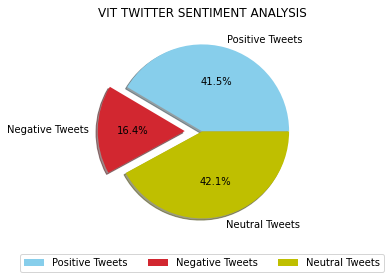

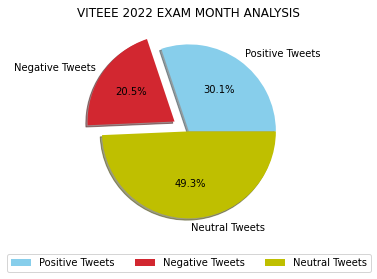

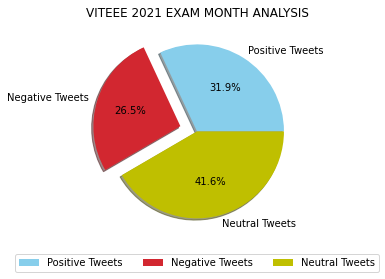

In [ ]:
plt.pie(percentage_oftweets_arr,labels=['Positive Tweets','Negative Tweets','Neutral Tweets'],colors=['#87CEEB','#D22730','y']
        ,explode = [0.0, 0.2,0],shadow='True',autopct='%.1f%%')

plt.title('VIT TWITTER SENTIMENT ANALYSIS')
plt.legend(labels=['Positive Tweets','Negative Tweets','Neutral Tweets'], loc='upper center',
           bbox_to_anchor=(0.5, -0.04), ncol=3)
plt.show()

#vitee 2022
plt.pie(percentage_oftweets_arr_2022,labels=['Positive Tweets','Negative Tweets','Neutral Tweets'],colors=['#87CEEB','#D22730','y']
        ,explode = [0.0, 0.2,0],shadow='True',autopct='%.1f%%')

plt.title('VITEEE 2022 EXAM MONTH ANALYSIS')
plt.legend(labels=['Positive Tweets','Negative Tweets','Neutral Tweets'], loc='upper center',
           bbox_to_anchor=(0.5, -0.04), ncol=3)
plt.show()

#viteee 2021
plt.pie(percentage_oftweets_arr_2021,labels=['Positive Tweets','Negative Tweets','Neutral Tweets'],colors=['#87CEEB','#D22730','y']
        ,explode = [0.0, 0.2,0],shadow='True',autopct='%.1f%%')

plt.title('VITEEE 2021 EXAM MONTH ANALYSIS')
plt.legend(labels=['Positive Tweets','Negative Tweets','Neutral Tweets'], loc='upper center',
           bbox_to_anchor=(0.5, -0.04), ncol=3)
plt.show()




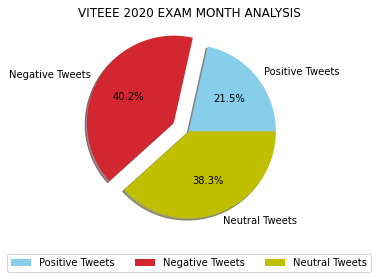

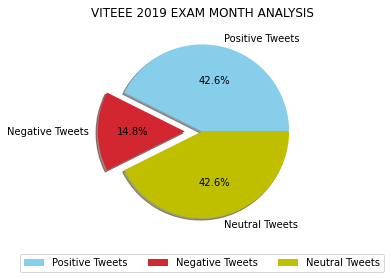

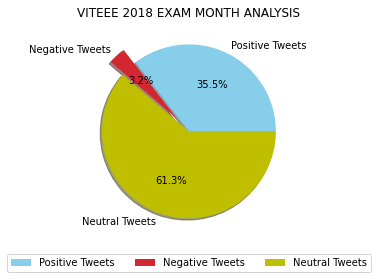

In [ ]:
#viteee 2020
plt.pie(percentage_oftweets_arr_2020,labels=['Positive Tweets','Negative Tweets','Neutral Tweets'],colors=['#87CEEB','#D22730','y']
        ,explode = [0.0, 0.2,0],shadow='True',autopct='%.1f%%')

plt.title('VITEEE 2020 EXAM MONTH ANALYSIS')
plt.legend(labels=['Positive Tweets','Negative Tweets','Neutral Tweets'], loc='upper center',
           bbox_to_anchor=(0.5, -0.04), ncol=3)
plt.show()
#viteee 2019
plt.pie(percentage_oftweets_arr_2019,labels=['Positive Tweets','Negative Tweets','Neutral Tweets'],colors=['#87CEEB','#D22730','y']
        ,explode = [0.0, 0.2,0],shadow='True',autopct='%.1f%%')

plt.title('VITEEE 2019 EXAM MONTH ANALYSIS')
plt.legend(labels=['Positive Tweets','Negative Tweets','Neutral Tweets'], loc='upper center',
           bbox_to_anchor=(0.5, -0.04), ncol=3)
plt.show()

#viteee 2018
plt.pie(percentage_oftweets_arr_2018,labels=['Positive Tweets','Negative Tweets','Neutral Tweets'],colors=['#87CEEB','#D22730','y']
        ,explode = [0.0, 0.2,0],shadow='True',autopct='%.1f%%')

plt.title('VITEEE 2018 EXAM MONTH ANALYSIS')
plt.legend(labels=['Positive Tweets','Negative Tweets','Neutral Tweets'], loc='upper center',
           bbox_to_anchor=(0.5, -0.04), ncol=3)
plt.show()


In [ ]:
all_words=""
all_words=all_words.join([sentence for sentence in tweets_df2['Cleaned Tweet'] ])

In [ ]:
wordcloud=WordCloud(width=800,height=600,random_state=42,max_font_size=100).generate(all_words)

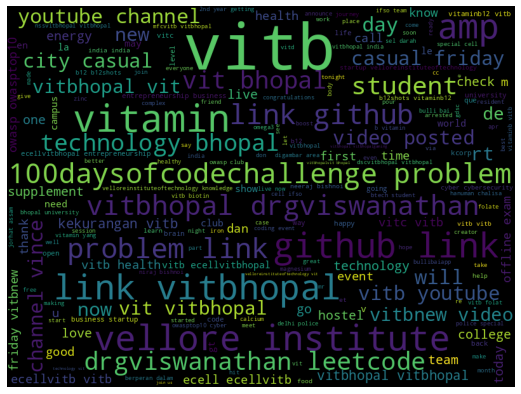

In [ ]:
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
### VITEE ANALYSIS YEAR WISE


In [ ]:
tweets_df2=(tweets_df2_2020)
cleaned_tweets=[]
for i in tweets_df2['Text']:
    temp=preprocess_tweet(i)
    cleaned_tweets.append(temp)
tweets_df2['Cleaned Tweet']=cleaned_tweets

In [ ]:
print(tweets_df2)

                     Datetime             Tweet Id  \
0   2020-08-28 20:40:11+00:00  1299446704488378368   
1   2020-08-27 08:41:38+00:00  1298903485270781952   
2   2020-08-26 13:49:40+00:00  1298618620449296389   
3   2020-08-25 15:32:30+00:00  1298282107576283136   
4   2020-08-20 13:54:46+00:00  1296445576494669824   
..                        ...                  ...   
102 2020-07-03 15:30:31+00:00  1279075054823911424   
103 2020-07-03 15:05:34+00:00  1279068775501922305   
104 2020-07-03 13:14:30+00:00  1279040822093045760   
105 2020-07-03 12:47:29+00:00  1279034026414665728   
106 2020-07-02 03:10:42+00:00  1278526486731874304   

                                                  Text         Username  \
0    @rishibagree @shirishthorat Saare states apne ...       Htqwertyht   
1    NRI candidates are also eligible for the VITEE...      BaharBharat   
2    VITEEE Eligibility criteria 2020: See the deta...         republic   
3    #chapter28 #heat #transfer #exercises #q41_q50

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
def positive_negative(tweets_df2):
  tweets_df2[['polarity', 'subjectivity']] = tweets_df2['Cleaned Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
  for index, row in tweets_df2['Cleaned Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweets_df2.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweets_df2.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df2.loc[index, 'sentiment'] = "neutral"
    tweets_df2.loc[index, 'neg'] = neg
    tweets_df2.loc[index, 'neu'] = neu
    tweets_df2.loc[index, 'pos'] = pos
    tweets_df2.loc[index, 'compound'] = comp

tweets_df2.head(5)

,Datetime,Tweet Id,Text,Username,Cleaned Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2020-08-28 20:40:11+00:00,1299446704488378368,@rishibagree @shirishthorat Saare states apne ...,Htqwertyht,saare states apne exam kara rahe hai par jee ...,0.0,0.0,negative,0.058,0.942,0.0,-0.4019
1,2020-08-27 08:41:38+00:00,1298903485270781952,NRI candidates are also eligible for the VITEE...,BaharBharat,nri candidates are also eligible for the vitee...,0.0,0.0,neutral,0.000,1.000,0.0,0.0000
2,2020-08-26 13:49:40+00:00,1298618620449296389,VITEEE Eligibility criteria 2020: See the deta...,republic,viteee eligibility criteria 2020 see the detai...,0.0,0.0,neutral,0.000,1.000,0.0,0.0000
3,2020-08-25 15:32:30+00:00,1298282107576283136,#chapter28 #heat #transfer #exercises #q41_q50...,kinkarmishra,chapter28 heat transfer exercises q41 q50 hcv...,0.0,0.0,neutral,0.000,1.000,0.0,0.0000
4,2020-08-20 13:54:46+00:00,1296445576494669824,#chapter28 #heat #transfer #exercises #q31_q40...,kinkarmishra,chapter28 heat transfer exercises q31 q40 hcv...,0.0,0.0,neutral,0.000,1.000,0.0,0.0000


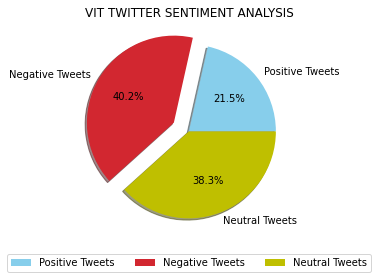

In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
percentage_oftweets=count_values_in_column(tweets_df2,"sentiment")
import matplotlib.pyplot as plt
import numpy
positive_tweet=percentage_oftweets['Percentage']['positive']
negative_tweet=percentage_oftweets['Percentage']['negative']
neutral_tweet=percentage_oftweets['Percentage']['neutral']
percentage_oftweets_arr=[positive_tweet,negative_tweet,neutral_tweet]
plt.pie(percentage_oftweets_arr,labels=['Positive Tweets','Negative Tweets','Neutral Tweets'],colors=['#87CEEB','#D22730','y']
        ,explode = [0.0, 0.2,0],shadow='True',autopct='%.1f%%')

plt.title('VIT TWITTER SENTIMENT ANALYSIS')
plt.legend(labels=['Positive Tweets','Negative Tweets','Neutral Tweets'], loc='upper center',
           bbox_to_anchor=(0.5, -0.04), ncol=3)
plt.show()